**In this Notebook, I have performing the strings relted task:**

`Finding specific strings or substrings in columns`

`Extracting substrings from unstructured data`

`Removing strings or substrings from a series`

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline


In [ ]:
report2015=pd.read_csv('/content/drive/MyDrive/dataquest/data-cleaning &Visualization/world_happiness-2015.csv')
report2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:
reportworld=pd.read_csv('/content/drive/MyDrive/dataquest/data-cleaning &Visualization/world-dev.csv')
reportworld.head()

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,NationalAccountsBaseYear,NationalAccountsReferenceYear,SnaPriceValuation,LendingCategory,OtherGroups,SystemOfNationalAccounts,AlternativeConversionFactor,PppSurveyYear,BalanceOfPaymentsManualInUse,ExternalDebtReportingStatus,SystemOfTrade,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2013.0,2000.0
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011.0,2013.0,2006.0
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,NaN,Middle East & North Africa,Upper middle income,DZ,1980,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1968 System of National Accou...,NaN,2011,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",NaN,NaN,2010.0,2013.0,2001.0
3,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,NaN,East Asia & Pacific,Upper middle income,AS,NaN,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,2011 (household consumption only).,NaN,NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,2007,NaN,NaN,NaN
4,ADO,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


Combine 2 datasets using pd.merge() as in the previous task.

In [ ]:
merge=pd.merge(left=report2015,right=reportworld,how='left',left_on='Country',right_on='ShortName')

In [ ]:
merge.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region_y,IncomeGroup,Wb2Code,NationalAccountsBaseYear,NationalAccountsReferenceYear,SnaPriceValuation,LendingCategory,OtherGroups,SystemOfNationalAccounts,AlternativeConversionFactor,PppSurveyYear,BalanceOfPaymentsManualInUse,ExternalDebtReportingStatus,SystemOfTrade,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,CHE,Switzerland,Switzerland,Switzerland,CH,Swiss franc,NaN,Europe & Central Asia,High income: OECD,CH,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,ISL,Iceland,Iceland,Republic of Iceland,IS,Iceland krona,NaN,Europe & Central Asia,High income: OECD,IS,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,DNK,Denmark,Denmark,Kingdom of Denmark,DK,Danish krone,NaN,Europe & Central Asia,High income: OECD,DK,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,NOR,Norway,Norway,Kingdom of Norway,NO,Norwegian krone,NaN,Europe & Central Asia,High income: OECD,NO,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,CAN,Canada,Canada,Canada,CA,Canadian dollar,Fiscal year end: March 31; reporting period fo...,North America,High income: OECD,CA,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,2011,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0


In [ ]:
##rename a column
merge.rename({'SourceOfMostRecentIncomeAndExpenditureData' :'IESurvey'}, axis=1, inplace=True)
merge.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region_y,IncomeGroup,Wb2Code,NationalAccountsBaseYear,NationalAccountsReferenceYear,SnaPriceValuation,LendingCategory,OtherGroups,SystemOfNationalAccounts,AlternativeConversionFactor,PppSurveyYear,BalanceOfPaymentsManualInUse,ExternalDebtReportingStatus,SystemOfTrade,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,CHE,Switzerland,Switzerland,Switzerland,CH,Swiss franc,NaN,Europe & Central Asia,High income: OECD,CH,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,ISL,Iceland,Iceland,Republic of Iceland,IS,Iceland krona,NaN,Europe & Central Asia,High income: OECD,IS,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,DNK,Denmark,Denmark,Kingdom of Denmark,DK,Danish krone,NaN,Europe & Central Asia,High income: OECD,DK,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,NOR,Norway,Norway,Kingdom of Norway,NO,Norwegian krone,NaN,Europe & Central Asia,High income: OECD,NO,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,CAN,Canada,Canada,Canada,CA,Canadian dollar,Fiscal year end: March 31; reporting period fo...,North America,High income: OECD,CA,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,2011,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0


In [ ]:
len(merge.columns)

43

In [ ]:
col=['Country','Happiness Rank', 'Happiness Score', 
            'CountryCode', 'ShortName', 'CurrencyUnit', 'IncomeGroup',
           'SpecialNotes', 'IESurvey']
merge=merge[col]
merge.head()

,Country,Happiness Rank,Happiness Score,CountryCode,ShortName,CurrencyUnit,IncomeGroup,SpecialNotes,IESurvey
0,Switzerland,1,7.587,CHE,Switzerland,Swiss franc,High income: OECD,NaN,"Expenditure survey/budget survey (ES/BS), 2004"
1,Iceland,2,7.561,ISL,Iceland,Iceland krona,High income: OECD,NaN,"Integrated household survey (IHS), 2010"
2,Denmark,3,7.527,DNK,Denmark,Danish krone,High income: OECD,NaN,"Income tax registers (ITR), 2010"
3,Norway,4,7.522,NOR,Norway,Norwegian krone,High income: OECD,NaN,"Income survey (IS), 2010"
4,Canada,5,7.427,CAN,Canada,Canadian dollar,High income: OECD,Fiscal year end: March 31; reporting period fo...,"Labor force survey (LFS), 2010"


In [ ]:
def extract_last_word(element):
  return str(element).split()[-1]#take last word after splitting

merge['CurrencyApply']=merge['CurrencyUnit'].apply(extract_last_word)#create a new column
merge.head()

,Country,Happiness Rank,Happiness Score,CountryCode,ShortName,CurrencyUnit,IncomeGroup,SpecialNotes,IESurvey,CurrencyApply
0,Switzerland,1,7.587,CHE,Switzerland,Swiss franc,High income: OECD,NaN,"Expenditure survey/budget survey (ES/BS), 2004",franc
1,Iceland,2,7.561,ISL,Iceland,Iceland krona,High income: OECD,NaN,"Integrated household survey (IHS), 2010",krona
2,Denmark,3,7.527,DNK,Denmark,Danish krone,High income: OECD,NaN,"Income tax registers (ITR), 2010",krone
3,Norway,4,7.522,NOR,Norway,Norwegian krone,High income: OECD,NaN,"Income survey (IS), 2010",krone
4,Canada,5,7.427,CAN,Canada,Canadian dollar,High income: OECD,Fiscal year end: March 31; reporting period fo...,"Labor force survey (LFS), 2010",dollar


[pandas supports some built in vectorized methods for Series. You can check the full list here
](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html)

In [ ]:
merge['CurrencyUnit'].str[0:5][:5] # access the first 5 characters in each element

0    Swiss
1    Icela
2    Danis
3    Norwe
4    Canad
Name: CurrencyUnit, dtype: object

In [ ]:
merge['CurrencyUnit'].str.upper()[:5] # convert all strings of each element to uppercase

0        SWISS FRANC
1      ICELAND KRONA
2       DANISH KRONE
3    NORWEGIAN KRONE
4    CANADIAN DOLLAR
Name: CurrencyUnit, dtype: object

In [ ]:
# come back to our main task
merge['Currency Vectorized'] = merge.loc[:, 'CurrencyUnit'].str.split().str.get(-1)
merge['Currency Vectorized'].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Vectorized, dtype: object

In [ ]:
# check if there are missing values in a column
merge['CurrencyUnit'].isnull().sum() 
# first, we apply `isnull()` to check the missing values in each row; 
#   then we sum of all result which is True/False or  0/1

13

count the length of each currency unit in the column CurrencyUnit and then check how many of "that length" in the column.

In [ ]:
lengths = merge['CurrencyUnit'].str.len() # find len of each string in each row in the Currency Unit column
value_counts = lengths.value_counts(dropna=False) # count the result
value_counts

14.0    21
4.0     20
12.0    17
13.0    14
NaN     13
15.0    13
16.0    12
18.0     9
17.0     9
11.0     8
22.0     7
25.0     5
19.0     3
9.0      2
10.0     1
39.0     1
26.0     1
23.0     1
20.0     1
Name: CurrencyUnit, dtype: int64

we see 3 benefit of using vectorized string methods:

Better performance

Code that is easier to read and write

Automatically excludes missing values

`Regular Expressions (RegEx)`

Take a look on the column SpecialNotes, we wanna find comments containing phrase national accounts. But how?

Using Regular Expressions (RegEx)! Read this to know how to use regex in python.

In [ ]:
merge.head()

,Country,Happiness Rank,Happiness Score,CountryCode,ShortName,CurrencyUnit,IncomeGroup,SpecialNotes,IESurvey,CurrencyApply,Currency Vectorized
0,Switzerland,1,7.587,CHE,Switzerland,Swiss franc,High income: OECD,NaN,"Expenditure survey/budget survey (ES/BS), 2004",franc,franc
1,Iceland,2,7.561,ISL,Iceland,Iceland krona,High income: OECD,NaN,"Integrated household survey (IHS), 2010",krona,krona
2,Denmark,3,7.527,DNK,Denmark,Danish krone,High income: OECD,NaN,"Income tax registers (ITR), 2010",krone,krone
3,Norway,4,7.522,NOR,Norway,Norwegian krone,High income: OECD,NaN,"Income survey (IS), 2010",krone,krone
4,Canada,5,7.427,CAN,Canada,Canadian dollar,High income: OECD,Fiscal year end: March 31; reporting period fo...,"Labor force survey (LFS), 2010",dollar,dollar


Although we can use re package but luckily, refex is integrated in pandas with vectorized string methods to make finding and extracting patterns of characters easier.

In [ ]:
pattern = r"[Nn]ational accounts" # National or national are accepted!
national_accounts = merge['SpecialNotes'].str.contains(pattern) # find comments containing the pattern
print(national_accounts.head(7))


0      NaN
1      NaN
2      NaN
3      NaN
4     True
5    False
6    False
Name: SpecialNotes, dtype: object


In [ ]:
# how many of comments containing this pattern?
national_accounts.value_counts(dropna=False)

NaN      65
True     54
False    39
Name: SpecialNotes, dtype: int64

In [ ]:
merge[national_accounts]

ValueError: ignored

Because national_accounts has NaN values, we cannot apply it to merged. We need to change all values NaN to False so that we don't consider it.

In [ ]:
national_accounts = merge['SpecialNotes'].str.contains(r"[Nn]ational accounts", na=False) # replace na by False
merge[national_accounts].head() # df contains only the comments going with the pattern.

,Country,Happiness Rank,Happiness Score,CountryCode,ShortName,CurrencyUnit,IncomeGroup,SpecialNotes,IESurvey,CurrencyApply,Currency Vectorized
4,Canada,5,7.427,CAN,Canada,Canadian dollar,High income: OECD,Fiscal year end: March 31; reporting period fo...,"Labor force survey (LFS), 2010",dollar,dollar
7,Sweden,8,7.364,SWE,Sweden,Swedish krona,High income: OECD,Fiscal year end: June 30; reporting period for...,"Income survey (IS), 2005",krona,krona
8,New Zealand,9,7.286,NZL,New Zealand,New Zealand dollar,High income: OECD,Fiscal year end: March 31; reporting period fo...,NaN,dollar,dollar
9,Australia,10,7.284,AUS,Australia,Australian dollar,High income: OECD,Fiscal year end: June 30; reporting period for...,"Expenditure survey/budget survey (ES/BS), 2003",dollar,dollar
14,United States,15,7.119,USA,United States,U.S. dollar,High income: OECD,Fiscal year end: September 30; reporting perio...,"Labor force survey (LFS), 2010",dollar,dollar


We wanna extract any year from SpecialNotes columns.

The years follow following pattern

In [ ]:
pattern = r"([1-2][0-9]{3})" # [0-9] appears 3 times
merge['SpecialNotes'].str.extract(pattern, expand=True)[20:25] # check some and extract only the first match
#.str.extractall(): extract all matches.
# expand=True : return the results as a dataframe

,0
20,NaN
21,2010
22,NaN
23,1993
24,2007


In [ ]:
merge = merge.set_index('Country') # make "Country" column as the index
merge.head()

,Happiness Rank,Happiness Score,CountryCode,ShortName,CurrencyUnit,IncomeGroup,SpecialNotes,IESurvey,CurrencyApply,Currency Vectorized
Country,,,,,,,,,,
Switzerland,1,7.587,CHE,Switzerland,Swiss franc,High income: OECD,NaN,"Expenditure survey/budget survey (ES/BS), 2004",franc,franc
Iceland,2,7.561,ISL,Iceland,Iceland krona,High income: OECD,NaN,"Integrated household survey (IHS), 2010",krona,krona
Denmark,3,7.527,DNK,Denmark,Danish krone,High income: OECD,NaN,"Income tax registers (ITR), 2010",krone,krone
Norway,4,7.522,NOR,Norway,Norwegian krone,High income: OECD,NaN,"Income survey (IS), 2010",krone,krone
Canada,5,7.427,CAN,Canada,Canadian dollar,High income: OECD,Fiscal year end: March 31; reporting period fo...,"Labor force survey (LFS), 2010",dollar,dollar


In [ ]:
pattern = r"(?P<Years>[1-2][0-9]{3})" # we name the capturing group "Years"
merge['SpecialNotes'].str.extractall(pattern).head()


Years
  match      
5 0      1999
  1      1999
6 0      1999
  1      2037
  2      1999

In [ ]:
merge.head()

,Country,Happiness Rank,Happiness Score,CountryCode,ShortName,CurrencyUnit,IncomeGroup,SpecialNotes,IESurvey,CurrencyApply,Currency Vectorized
0,Switzerland,1,7.587,CHE,Switzerland,Swiss franc,High income: OECD,NaN,"Expenditure survey/budget survey (ES/BS), 2004",franc,franc
1,Iceland,2,7.561,ISL,Iceland,Iceland krona,High income: OECD,NaN,"Integrated household survey (IHS), 2010",krona,krona
2,Denmark,3,7.527,DNK,Denmark,Danish krone,High income: OECD,NaN,"Income tax registers (ITR), 2010",krone,krone
3,Norway,4,7.522,NOR,Norway,Norwegian krone,High income: OECD,NaN,"Income survey (IS), 2010",krone,krone
4,Canada,5,7.427,CAN,Canada,Canadian dollar,High income: OECD,Fiscal year end: March 31; reporting period fo...,"Labor force survey (LFS), 2010",dollar,dollar


Take a look on column IESurvey. This column has years in two different formats: 2012, 2010/11. Let's extract all years from this column.

In [ ]:
pattern = r"(?P<First_Year>[1-2][0-9]{3})/?(?P<Second_Year>[0-9]{2})?"
years = merge['IESurvey'].str.extractall(pattern)
years.tail()

,,First_Year,Second_Year
,match,,
152,0,2008,NaN
153,0,2010,11
154,0,2011,12
156,0,2006,NaN
157,0,2011,NaN


xplain:

? after each of the two new groups to indicate that a match for those groups is optional. In this case, / and the year after / is optional (there are some row having them, there are some not having them).
Each group of expression much be put inside a (). If we don't put this parenthese, the result will not contain it (for example, the result doesn't have column /).
If there are duplicates, you can use {}.

In [ ]:
first_two_year = years['First_Year'].str[0:2] # take first 2 digits of the First Year
years['Second_Year'] = first_two_year + years['Second_Year'] # add these 2 digits to the Second Year
years.tail()

,,First_Year,Second_Year
,match,,
152,0,2008,NaN
153,0,2010,2011
154,0,2011,2012
156,0,2006,NaN
157,0,2011,NaN


Next, we'll group merged by the IncomeGroup column and plot the results but let's clean the values in it first.

In [ ]:
# remove "income", ":" and redundant spaces.
merge['IncomeGroup'] = merge['IncomeGroup'].str.replace(' income', '').str.replace(':', '').str.upper()



In [ ]:
merge.head()

,Country,Happiness Rank,Happiness Score,CountryCode,ShortName,CurrencyUnit,IncomeGroup,SpecialNotes,IESurvey,CurrencyApply,Currency Vectorized
0,Switzerland,1,7.587,CHE,Switzerland,Swiss franc,HIGH OECD,NaN,"Expenditure survey/budget survey (ES/BS), 2004",franc,franc
1,Iceland,2,7.561,ISL,Iceland,Iceland krona,HIGH OECD,NaN,"Integrated household survey (IHS), 2010",krona,krona
2,Denmark,3,7.527,DNK,Denmark,Danish krone,HIGH OECD,NaN,"Income tax registers (ITR), 2010",krone,krone
3,Norway,4,7.522,NOR,Norway,Norwegian krone,HIGH OECD,NaN,"Income survey (IS), 2010",krone,krone
4,Canada,5,7.427,CAN,Canada,Canadian dollar,HIGH OECD,Fiscal year end: March 31; reporting period fo...,"Labor force survey (LFS), 2010",dollar,dollar


In [ ]:
import matplotlib.pyplot as plt

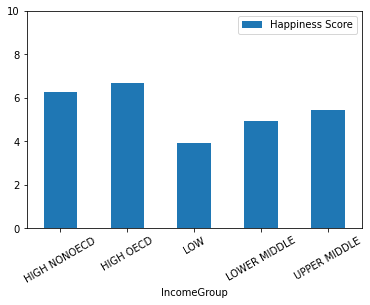

In [ ]:
pv_incomes = merge.pivot_table(values='Happiness Score', index='IncomeGroup')

pv_incomes.plot(kind='bar', rot=30, ylim=(0,10))
plt.show()